In [32]:
import pandas as pd
import os
print(os.getcwd())

# Load the dataset
df = pd.read_csv('retail_data.csv')

# Inspect the data
df.head()




c:\Users\dvada\OneDrive\Desktop\market_basket_analysis\notebooks


,InvoiceNo,Description
0,10001,Bread
1,10001,Milk
2,10001,Butter
3,10002,Bread
4,10002,Diaper


In [33]:
transactions = pd.get_dummies(df['Description'])


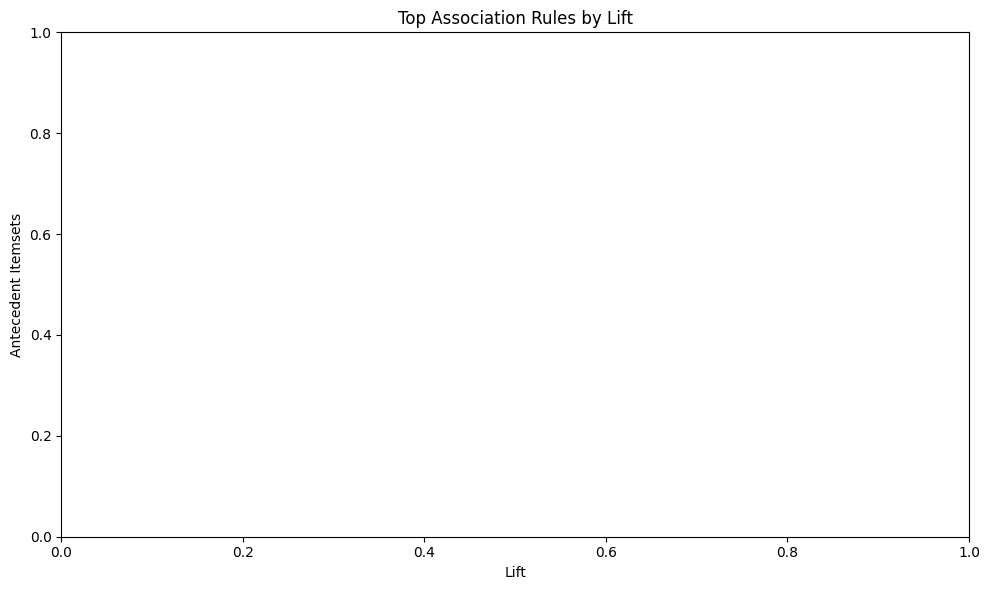

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert antecedents to string for labeling
filtered_rules = filtered_rules.copy() # type: ignore
filtered_rules['antecedents_str'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))

# Sort by lift and select top N (optional)
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents_str', data=top_rules, palette='viridis')
plt.title('Top Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedent Itemsets')
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd

# Step 1: Load the data
df = pd.read_csv('retail_data.csv')

# Step 2: Create a basket matrix
basket = df.groupby(['InvoiceNo', 'Description'])['Description'] \
           .count().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Step 3: Convert quantities to binary (0/1)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())


Description  Beer  Bread  Butter  Cola  Diaper  Milk
InvoiceNo                                           
10001           0      1       1     0       0     1
10002           0      1       0     0       1     0
10003           1      0       0     0       1     1
10004           1      1       0     1       1     1


C:\Users\dvada\AppData\Local\Temp\ipykernel_10608\2058441943.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    antecedents                  consequents  support  confidence      lift
0        (Cola)                       (Beer)     0.25    1.000000  2.000000
1        (Beer)                       (Cola)     0.25    0.500000  2.000000
2      (Diaper)                       (Beer)     0.50    0.666667  1.333333
3        (Beer)                     (Diaper)     0.50    1.000000  1.333333
4        (Milk)                       (Beer)     0.50    0.666667  1.333333
..          ...                          ...      ...         ...       ...
165    (Diaper)    (Milk, Bread, Cola, Beer)     0.25    0.333333  1.333333
166      (Milk)  (Diaper, Bread, Cola, Beer)     0.25    0.333333  1.333333
167      (Cola)  (Diaper, Milk, Bread, Beer)     0.25    1.000000  4.000000
168      (Beer)  (Diaper, Milk, Bread, Cola)     0.25    0.500000  2.000000
169     (Bread)   (Diaper, Milk, Cola, Beer)     0.25    0.333333  1.333333

[170 rows x 5 columns]


c:\Users\dvada\OneDrive\Desktop\market_basket_analysis\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
rules.to_csv("association_rules.csv", index=False)